# Matplotlib 그래프 이론 + 예시 코드

이 노트북은 그래프의 이론(왜 이렇게 그리는가)과 실제 코드(어떻게 그리는가)를 1:1로 연결합니다.

구성:
1. 그래프의 목적
2. 그래프의 4대 기본 유형
3. 데이터 유형별 그래프 선택 기준
4. 그래프의 기본 요소 (5요소 이론)
5. 인지 과학적 시각화 원칙
6. 색(color)과 시각 심리학
7. 축의 스케일(Scale)
8. 데이터 왜곡과 주의점
9. 좋은 그래프의 조건 (3C 법칙)
10. 그래프 설계 과정 (5단계)
11. 실무 예시 (매출+성장률 twinx)


## 0️⃣ 준비하기 (공통 설정)
Matplotlib, numpy, pandas를 불러오고 한글 폰트, 스타일을 설정합니다.
이 셀은 먼저 한 번 실행해 두고 아래 예제들을 돌리면 됩니다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
print('환경 준비 완료')

환경 준비 완료


## 1️⃣ 그래프의 목적
목적: 변화, 패턴, 관계를 시각적으로 보여줘서 메시지를 빠르게 전달하는 것.

예: 시간에 따른 변화(추세)를 강조하고 싶으면 선 그래프(line plot)가 적절합니다.

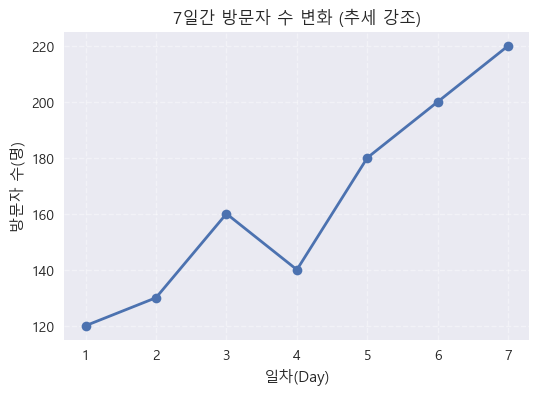

In [2]:
# 예시: 일자별 방문자 수(추세)
days = np.arange(1, 8)
visitors = [120, 130, 160, 140, 180, 200, 220]

plt.figure(figsize=(6,4))
plt.plot(days, visitors, marker='o', linewidth=2)
plt.title('7일간 방문자 수 변화 (추세 강조)')
plt.xlabel('일차(Day)')
plt.ylabel('방문자 수(명)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

## 2️⃣ 그래프의 4대 기본 유형
데이터 목적에 따라 그래프가 달라집니다. 아래 각 유형과 예시 코드를 같이 봅니다.


### 2-1. 선 그래프 (Line Plot) → 시간에 따른 변화, 추세

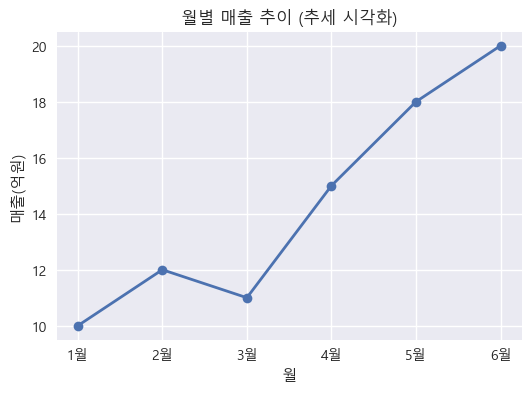

In [3]:
months = ['1월','2월','3월','4월','5월','6월']
sales_trend = [10, 12, 11, 15, 18, 20]

plt.figure(figsize=(6,4))
plt.plot(months, sales_trend, marker='o', linewidth=2)
plt.title('월별 매출 추이 (추세 시각화)')
plt.xlabel('월')
plt.ylabel('매출(억원)')
plt.show()

### 2-2. 막대 그래프 (Bar) → 범주별 비교

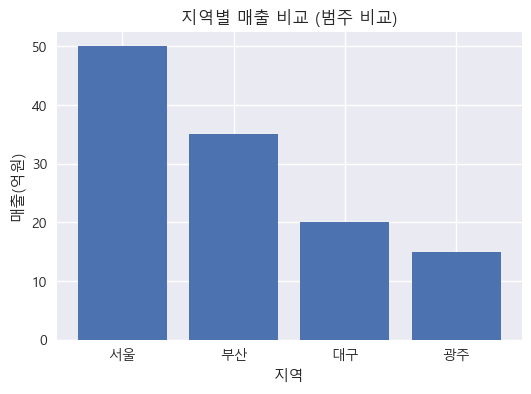

In [4]:
regions = ['서울','부산','대구','광주']
revenue_region = [50, 35, 20, 15]

plt.figure(figsize=(6,4))
plt.bar(regions, revenue_region)
plt.title('지역별 매출 비교 (범주 비교)')
plt.xlabel('지역')
plt.ylabel('매출(억원)')
plt.show()

### 2-3. 원형 그래프 (Pie) → 구성비 비율

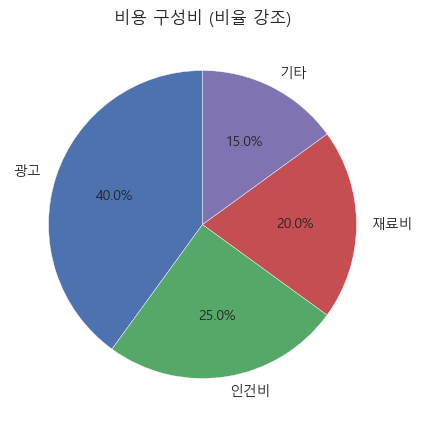

In [5]:
labels = ['광고', '인건비', '재료비', '기타']
costs = [40, 25, 20, 15]

plt.figure(figsize=(5,5))
plt.pie(costs, labels=labels, autopct='%.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'white'})
plt.title('비용 구성비 (비율 강조)')
plt.show()

### 2-4. 분포 그래프 (Histogram / Boxplot) → 데이터가 어떻게 퍼졌는지

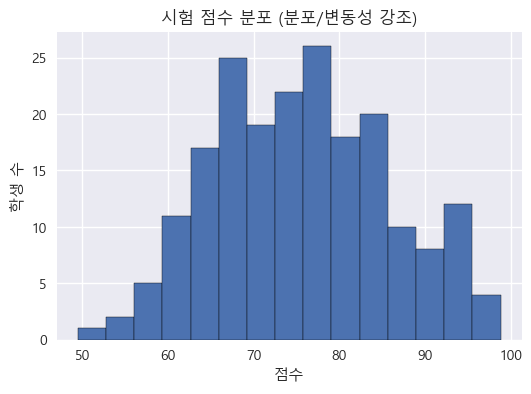

In [6]:
np.random.seed(0)
scores = np.random.normal(loc=75, scale=10, size=200)

plt.figure(figsize=(6,4))
plt.hist(scores, bins=15, edgecolor='black')
plt.title('시험 점수 분포 (분포/변동성 강조)')
plt.xlabel('점수')
plt.ylabel('학생 수')
plt.show()

C:\Users\haram4th\AppData\Local\Temp\ipykernel_8564\1758429174.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores, labels=['점수'])


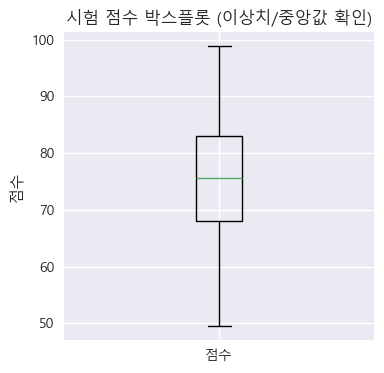

In [7]:
# 같은 데이터를 boxplot으로 표현하면 중앙값, 이상치까지 한 번에 보입니다.
plt.figure(figsize=(4,4))
plt.boxplot(scores, labels=['점수'])
plt.title('시험 점수 박스플롯 (이상치/중앙값 확인)')
plt.ylabel('점수')
plt.show()

## 3️⃣ 데이터 유형별 그래프 선택 기준
데이터의 특성(시간? 범주? 관계?)에 따라 '올바른' 그래프가 달라집니다.

예시 1) 범주형(지역별 매출): 막대 그래프
예시 2) 상관형(공부시간 vs 점수): 산점도

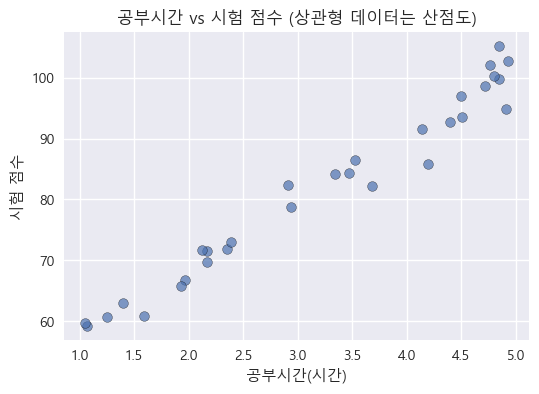

In [8]:
# 예시 2: 공부시간과 점수의 관계 (상관관계 시각화)
study_hours = np.random.uniform(1, 5, 30)
scores2 = 50 + study_hours * 10 + np.random.normal(0, 3, 30)

plt.figure(figsize=(6,4))
plt.scatter(study_hours, scores2, alpha=0.7, edgecolor='black')
plt.title('공부시간 vs 시험 점수 (상관형 데이터는 산점도)')
plt.xlabel('공부시간(시간)')
plt.ylabel('시험 점수')
plt.show()

## 4️⃣ 그래프의 기본 요소 (5요소 이론)
데이터 / 축 / 마크 / 채널 / 맥락 을 실제 코드에서 어떻게 표현하는지 보겠습니다.

* 데이터(Data)
그래프의 재료가 되는 값.<br>
무엇을 비교/설명하려고 하는가?<br>

* 축(Axis)
그 데이터를 어디에 둘지 결정하는 좌표계와 눈금/라벨.<br>
값의 의미와 스케일(범위)을 알려준다.<br>

* 마크(Mark)
데이터를 시각적으로 찍는 기본 도형(선, 점, 막대 등).<br>
“어떤 형태로 그릴까?”<br>

* 채널(Channel)
마크를 구분하거나 강조하는 시각적 속성(색, 모양, 크기, 선스타일 등).<br>
“어떻게 보이게 할까?”<br>

* 맥락(Context)
그래프를 이해하기 위한 추가 설명 요소(제목, 축 라벨, 단위, 범례, 주석, 그리드 등).<br>
“이 그래프가 무슨 의미인지 혼자서도 이해 가능하게 만드는 정보.”<br>

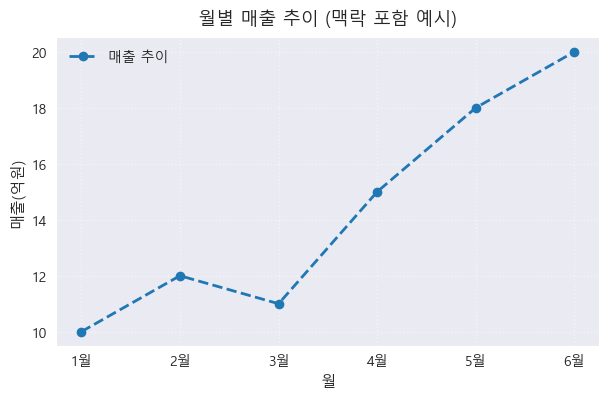

In [9]:
months = ['1월','2월','3월','4월','5월','6월']
sales = [10, 12, 11, 15, 18, 20]

plt.figure(figsize=(7,4))
plt.plot(months, sales,
         color='tab:blue', linestyle='--', marker='o', linewidth=2,
         label='매출 추이')

plt.title('월별 매출 추이 (맥락 포함 예시)', fontsize=13, pad=10)
plt.xlabel('월')
plt.ylabel('매출(억원)')
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend(frameon=False)
plt.show()

## 5️⃣ 인지 과학적 시각화 원칙
Edward Tufte 등의 시각화 원칙: 데이터-잉크 비율, 비교 가능성, 맥락, 왜곡 금지.<br>
좋은 시각화란, 데이터의 진실을 왜곡 없이, 비교 가능하고, 맥락 속에서 명료하게 보여주는 것이다.<br>
불필요한 장식은 줄이고, 데이터 그 자체가 최대한의 “잉크”를 차지하게 하라.<br>
아래 코드는 '필요한 정보만 남기고' 깔끔하게 보여주는 예시입니다.

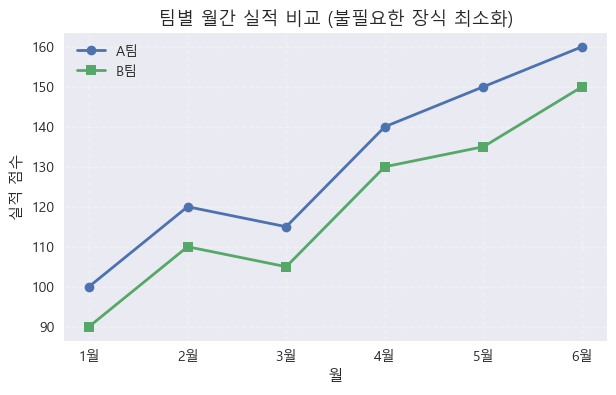

In [10]:
months = ['1월','2월','3월','4월','5월','6월']
team_a = [100,120,115,140,150,160]
team_b = [90,110,105,130,135,150]

plt.figure(figsize=(7,4))
plt.plot(months, team_a, marker='o', linewidth=2, label='A팀')
plt.plot(months, team_b, marker='s', linewidth=2, label='B팀')

plt.title('팀별 월간 실적 비교 (불필요한 장식 최소화)', fontsize=13)
plt.xlabel('월')
plt.ylabel('실적 점수')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(frameon=False)
plt.show()

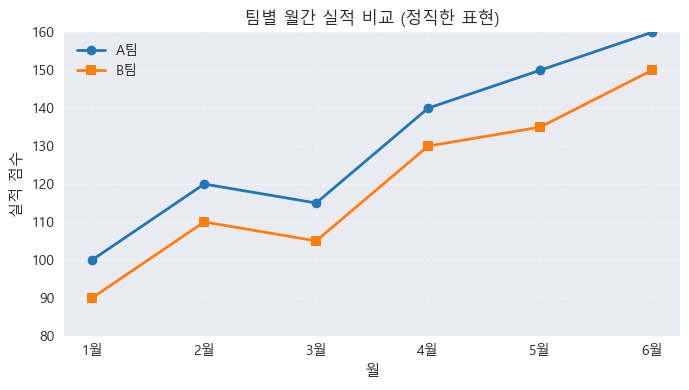

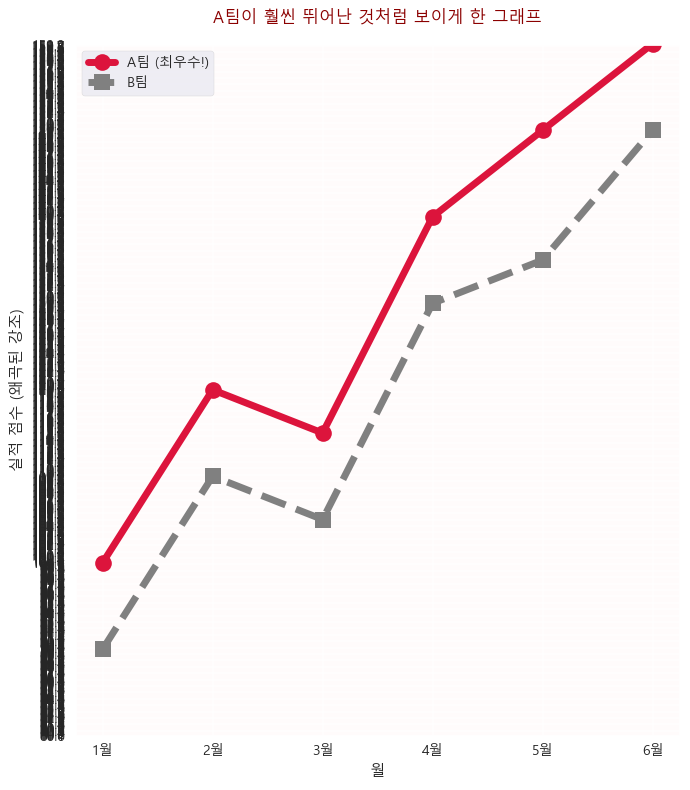

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
months = ['1월','2월','3월','4월','5월','6월']
team_a = [100,120,115,140,150,160]
team_b = [90,110,105,130,135,150]

########################################
# 1️⃣ 좋은 예 (정직한 표현)
########################################
plt.figure(figsize=(7,4))
plt.plot(months, team_a, marker='o', linewidth=2, label='A팀', color='tab:blue')
plt.plot(months, team_b, marker='s', linewidth=2, label='B팀', color='tab:orange')

plt.title('팀별 월간 실적 비교 (정직한 표현)', fontsize=12)
plt.xlabel('월')
plt.ylabel('실적 점수')

# y축 범위: 80~160 (정직하고 자연스러운 표현)
plt.ylim(80, 160)
plt.yticks(np.arange(80, 161, 10))

plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


########################################
# 2️⃣ 나쁜 예 (극단적 왜곡)
########################################
plt.figure(figsize=(7,8))  # 세로로 과도하게 늘림
plt.plot(months, team_a, marker='o', linewidth=5, markersize=12,
         label='A팀 (최우수!)', color='crimson')
plt.plot(months, team_b, marker='s', linewidth=5, markersize=12,
         label='B팀', color='gray', linestyle='--')

plt.title('A팀이 훨씬 뛰어난 것처럼 보이게 한 그래프', fontsize=12, color='darkred', pad=15)
plt.xlabel('월')
plt.ylabel('실적 점수 (왜곡된 강조)')

# 같은 범위(80~160)이지만 시각적으로 과장됨
plt.ylim(80, 160)
plt.yticks(np.arange(80, 160, 0.1))  # 비정상적으로 촘촘한 눈금

# 배경 강조 + 과한 선두께
plt.gca().set_facecolor('#fff0f0')
plt.grid(True, linestyle='-', linewidth=1.2, alpha=0.6)

for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.legend(frameon=True, loc='upper left')
plt.tight_layout()
plt.show()


## 6️⃣ 색(color)과 시각 심리학
색은 '장식'이 아니라 '강조'를 위한 도구입니다.

- 빨강: 위험, 경고, 급증
- 파랑: 안정, 신뢰, 기준선

아래 예제에서는 '비정상적으로 높게 튄 값'만 빨간색으로 강조합니다.

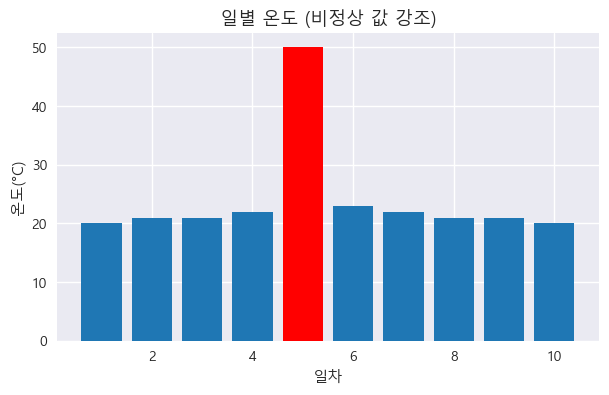

In [11]:
days = np.arange(1, 11)
temp = [20,21,21,22,50,23,22,21,21,20]  # 50은 비정상적으로 높은 값

colors = ['tab:blue' if t < 30 else 'red' for t in temp]

plt.figure(figsize=(7,4))
plt.bar(days, temp, color=colors)
plt.title('일별 온도 (비정상 값 강조)', fontsize=13)
plt.xlabel('일차')
plt.ylabel('온도(°C)')
plt.show()

## 7️⃣ 축의 스케일(Scale)
* 축은 해석 방식을 바꾼다. 특히 로그 스케일은 큰 수 차이를 더 읽기 쉽게 만든다. 
예: 트래픽이 10, 100, 1000, 10000처럼 기하급수적으로 증가할 때.
* 선형 축은 절대적 차이(얼마나 늘었나) 를, 로그 축은 비율적 변화(몇 배 커졌나) 를 보여준다.
* 축 선택은 해석을 바꾸므로 항상 의도와 맥락을 함께 설명해야 한다.
* 상황에 따라 위험을 과소평가하거나, 변화를 축소할 수 있음.

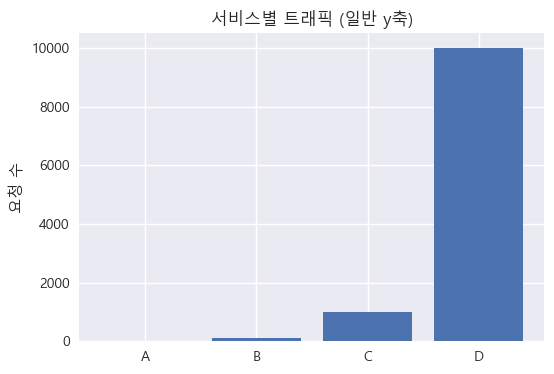

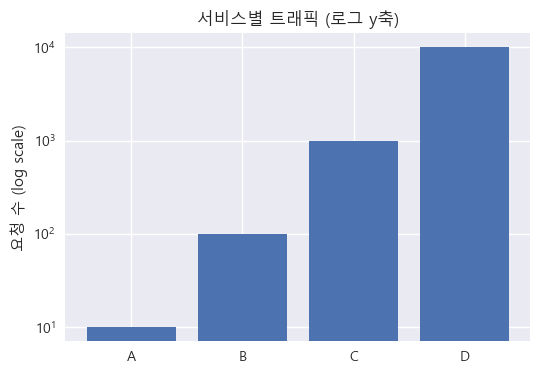

In [12]:
traffic = [10, 100, 1000, 10000]
xpos = np.arange(len(traffic))

# 일반 y축
plt.figure(figsize=(6,4))
plt.bar(xpos, traffic)
plt.xticks(xpos, ['A','B','C','D'])
plt.title('서비스별 트래픽 (일반 y축)')
plt.ylabel('요청 수')
plt.show()

# 로그 y축
plt.figure(figsize=(6,4))
plt.bar(xpos, traffic)
plt.xticks(xpos, ['A','B','C','D'])
plt.yscale('log')
plt.title('서비스별 트래픽 (로그 y축)')
plt.ylabel('요청 수 (log scale)')
plt.show()

## 8️⃣ 데이터 왜곡과 주의점
y축 시작점을 조작하면 '별로 안 오른 값'도 '엄청 오른 것처럼' 보이게 만들 수 있습니다.
같은 데이터를 두 방식으로 표현해 보세요.

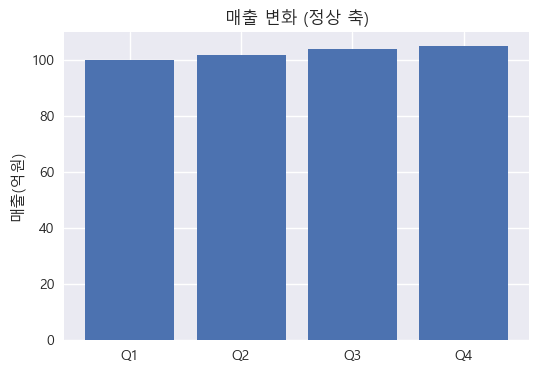

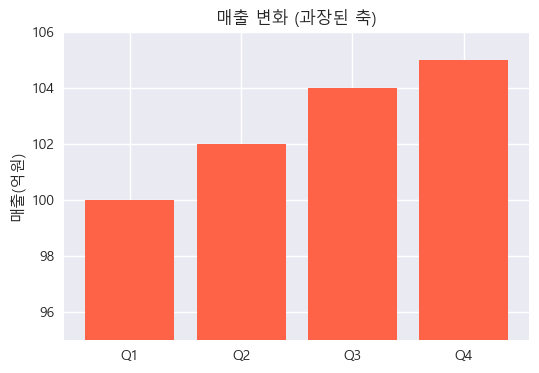

In [13]:
values = [100, 102, 104, 105]
x = np.arange(len(values))

# 정상 표현 (y축 0부터)
plt.figure(figsize=(6,4))
plt.bar(x, values)
plt.xticks(x, ['Q1','Q2','Q3','Q4'])
plt.title('매출 변화 (정상 축)')
plt.ylabel('매출(억원)')
plt.ylim(0,110)
plt.show()

# 과장된 표현 (y축 상단 일부만 보여줌)
plt.figure(figsize=(6,4))
plt.bar(x, values, color='tomato')
plt.xticks(x, ['Q1','Q2','Q3','Q4'])
plt.title('매출 변화 (과장된 축)')
plt.ylabel('매출(억원)')
plt.ylim(95,106)  # 아주 좁은 범위로 확대
plt.show()

## 9️⃣ 좋은 그래프의 조건 (3C 법칙)
좋은 그래프 = Clarity(명확하게) + Consistency(일관되게) + Context(맥락 있게).<br>
→ “쉽게 읽히고, 혼동이 없으며, 스스로 설명할 수 있는 그래프.”

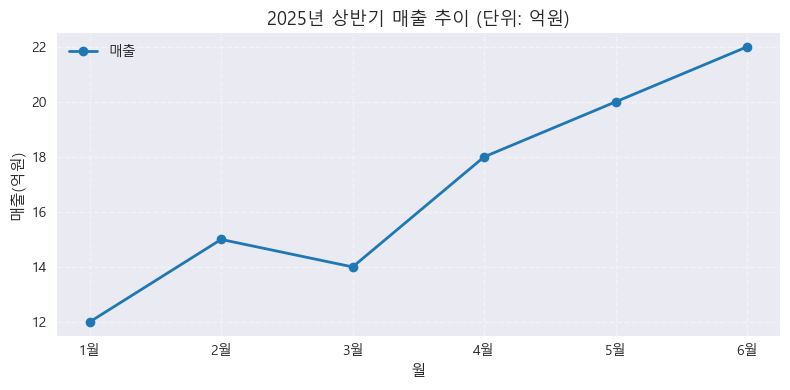

In [14]:
months = ['1월','2월','3월','4월','5월','6월']
revenue = [12, 15, 14, 18, 20, 22]   # 억원 단위 가정

plt.figure(figsize=(8,4))
plt.plot(months, revenue, marker='o', linewidth=2, color='#1f77b4', label='매출')

# Context: 제목에 기간/단위 포함
plt.title('2025년 상반기 매출 추이 (단위: 억원)', fontsize=13)
plt.xlabel('월')
plt.ylabel('매출(억원)')

# Consistency: 하나의 색/스타일 유지, 불필요한 장식 없음
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

## 🔟 그래프 설계 과정 (5단계)
1. 문제 정의 → 무엇을 설명할 것인가?
2. 데이터 선택 → 핵심 지표만 고름
3. 그래프 유형 결정 → 추세? 비교? 상관?
4. 시각 요소 배치 → 제목, 축라벨, 범례, 단위
5. 메시지 강화 → 강조 색, 주석, 목표선

아래 코드는 '특정 시점의 이벤트'를 주석으로 강조하는 예시입니다.

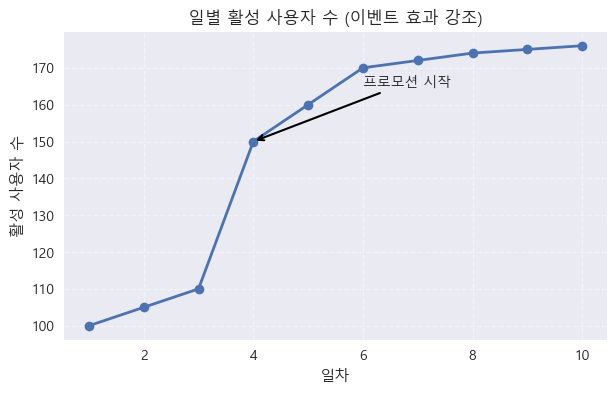

In [15]:
days = np.arange(1, 11)
users = [100,105,110,150,160,170,172,174,175,176]  # 하루에 갑자기 유입 급증 구간 포함

plt.figure(figsize=(7,4))
plt.plot(days, users, marker='o', linewidth=2)
plt.title('일별 활성 사용자 수 (이벤트 효과 강조)')
plt.xlabel('일차')
plt.ylabel('활성 사용자 수')
plt.grid(True, linestyle='--', alpha=0.4)

# 특정 변화 지점에 주석 추가
plt.annotate('프로모션 시작',
             xy=(4,150), xytext=(6,165),
             arrowprops=dict(arrowstyle='->', lw=1.5))

plt.show()

## 1️⃣1️⃣ 실무 예시: 매출(막대) + 성장률(선) 함께 보여주기
``` 
plt.twinx()는 하나의 x축을 공유하면서 y축을 두 개 사용하는 기능입니다.
즉, 같은 기간(또는 같은 카테고리) 에 대해

왼쪽 y축: 매출액(억원)

오른쪽 y축: 이익률(%)
처럼 단위가 다른 지표 두 개를 동시에 표시할 때 사용합니다.

경영 보고서나 실적 분석에서는

“매출은 얼마나 늘었나?”와

“이익률은 어떤 추세인가?”
를 한눈에 비교하는 게 중요합니다.

하지만 두 지표의 단위가 달라서(억원 vs %)
한 y축에 그리면 한쪽이 거의 안 보이게 됩니다.
이때 twinx()를 쓰면 두 축을 따로 표현하면서도
같은 x축(시간축 등)을 공유해 비교가 가능합니다.
```

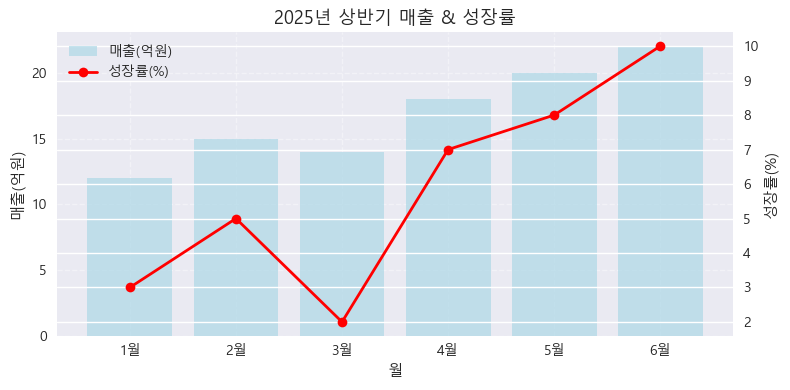

In [16]:
months = ['1월','2월','3월','4월','5월','6월']
revenue = [12, 15, 14, 18, 20, 22]     # 억원 단위 가정
growth = [3, 5, 2, 7, 8, 10]           # 전월 대비 성장률 (%) 가정

fig, ax1 = plt.subplots(figsize=(8,4))

# 왼쪽 축: 매출 (막대)
ax1.bar(months, revenue, color='lightblue', alpha=0.7, label='매출(억원)')
ax1.set_ylabel('매출(억원)')
ax1.set_xlabel('월')

# 오른쪽 축: 성장률 (선)
ax2 = ax1.twinx()
ax2.plot(months, growth, color='red', marker='o', linewidth=2, label='성장률(%)')
ax2.set_ylabel('성장률(%)')

# 제목과 부가정보
plt.title('2025년 상반기 매출 & 성장률', fontsize=13)
ax1.grid(True, linestyle='--', alpha=0.4)

# 범례(두 축의 label 합치기)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', frameon=False)

plt.tight_layout()
plt.show()